<AxesSubplot:>

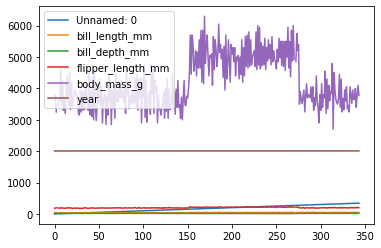

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

penguins = pd.read_csv("penguins.csv")

penguins.plot()